# Linear/Quadradic Discriminant Analysis

# Introduction

**WIP**

Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. But can also be use as classifier. LDA is supervised algorithm (requires labeled data). The terms Fisher's linear discriminant, LDA and Quadratic Linear Discriminant QDA are often used interchangeably, but there are differences (See  [this](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) and [this](https://en.wikipedia.org/wiki/Quadratic_classifier#Quadratic_discriminant_analysis) for better disambiguation):

* QDA and LDA are classifier technique. QDA is more general than LDA. The main assumptions are:    

    * The data are normally distributed. Multivariate Gaussians ($ N( x|  \mu, \Sigma) = \frac{1}{(2\pi)^{d/2}\sqrt{|\Sigma|}} \exp{\left[\frac{1}{2}( x-  \mu)\Sigma^{-1}( x-  \mu)^t\right]}$) are used to score a new unlabeled data (Both QDA and LDA).   
        
        - LDA assume all classes follows the same distribution ( **homosdacity** ), So all covariance matrix are identical.  

        - LDA assumes no multicollinearity between features. **Multicollinearity** can degraded prediction performance   
    * The observations are independent: features are assumed to be randomly sampled (Both QDA and LDA).    

LDA has been empirical verified to be relatively robust to slight violations of these assumptions. However, LDA is quite sensitive to outliers and the size of the smallest group must be larger (NICE to HAVE) than the number of predictor variables

* Fishers LDA is dimension reduction technique.  It does not make any assumptions. To see more about Fisher LDA see [Fisher LDA notebook](intro_fishers_lda.ipynb) 

In this notebook we mainly will be talking about  QDA/LDA as predictors. We normally use the word LDA to refers to QDA and LDA, but not Fishers LDA. For simplicity, the practical aspect of LDA will be explained utilzing a 2 class problem and bi-dimensional data.

## What is LDA

In the figure below describe LDA being applied to a bidimensional dataset containing 2 classes. The dataset is a set of $n$ d-dimensional samples $X = \{x_1, x_2, ..., x_n\}$ already labeled in 2 groups: 
$X^{(k)} = \{ x_1^{(k)},  x_2^{(k)}, ..., x_{n_k}^{(k)} \}$ of size $n_k$ for $k = 1,2$ where $x_i^{(k)}$ is a vector of dimension $d$. A new data $x_{new}$ is introduced in the graph and the goal of QDA/LDA is to determine which class $x_{new}$ belongs to.

<img src="images/lda_predictor.png" width="400"/>

The assumption of Linear and Quadradict discriminant analsys is that each class can be modelled by multivariate gaussian.

$ 
N( x|  \mu_k, \Sigma_k) = \frac{1}{(2\pi)^{d/2}\sqrt{|\Sigma_k|}} \exp{\left[\frac{1}{2}( x-  \mu_k)\Sigma_k^{-1}( x-  \mu_k)^t\right]}
$

The parameters of the Gaussian of each class can be estimated by using the mean and covariance of each group $X^{(k)}$.

for QDA
$
\boldsymbol\Sigma_k = \begin{bmatrix}
 \sigma^2(x_1) & cov(x_2,x_1) \\
 cov(x_1,x_2) &  \sigma^2(x_2)
\end{bmatrix}
$ for $x \in X^{(k)}$  or for LDA $
\boldsymbol\Sigma_k = \begin{bmatrix}
 \sigma^2 & 0 \\
 0 &  \sigma^2
\end{bmatrix}
$.

where the index $i$ denotes the dimension of $x$ and $x \in X^{(k)}$. Using Bayes theorem we can compute the probability that $x$ belongs to a class $k$ by:

$
P(C=k|X=x) = \frac{P(X=x|C=k)P(C=k)}{P(X=x)}
$

Where $P(X=x|C=k) = N( x|  \mu_k, \Sigma_k)$ (likelihood) and $P(C=k) = N_k/N$ (priori) and assuming $P(X=x) = const$ (evidence) is an uniform.
$P(C=k|X=x)$ gives the probability of $x$ belongs to class $k$ and it is known as posteriori. Taking the log of the posteriori and ignoring the denominator we have the score function:

$
\delta_k(x) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (x - \mu_k)\Sigma_k^{-1}(x - \mu_k)^t + \log \pi_k
$

$x_{new}$ will be labeled comparing the probabilities $\delta_k(x_{new})$.

### Summarizing the LDA/QDA approach in 5 steps

In practice the parameters of the Gaussian distribution are unknown or can be estimated. Below there are 5 steps to take to label a new data using QDA/LDA.

1. $\pi_k = N_k /N$, where $N_k$ is the number of observations in class k
2. $\hat{\mu_k} =  \frac{1}{N_k} \sum_{x_i\in X^{(k)}}  x_i^{(k)} \equiv mean(X^{(k)})$
3. $\hat{\Sigma_k} = \frac{1}{N_k -1}\sum_{x_i\in X^{(k)}} ( x_i^{(k)} -  \hat{\mu_k}) ( x_i^{(k)} - \hat{\mu_k})^t \equiv Cov(X^{k})$
4. Compute $\delta_k(x)$, the score function
5. assign label of the new data to the class with large $\delta_k(x)$.



In [1]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

1. load data
3. Summarize data
    * Global covariance matrix
    * Using the formula
    * Using numpy.cov
    * Visualize data

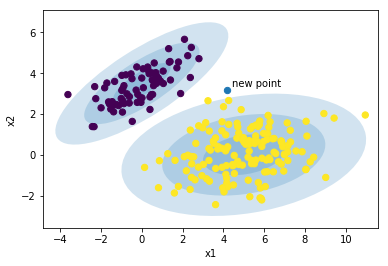

,label,x,y
52,1,-0.002936,3.763780
186,2,4.262321,1.490264
208,2,8.040557,-0.727553
4,1,-1.384546,2.107026
85,2,5.263274,0.182300


Global data mean:


array([3.2779, 1.1863])

Global data variance:


array([8.731 , 3.3836])

Global Covariance matrix:


array([[ 8.77  , -3.1375],
       [-3.1375,  3.3987]])

1st class true parmeters
 number of samples in first group N1: 75

 mean mu1:


[0.0, 3.5]

 Covariance matrix:


[[2.0, 1.1], [1.1, 1.0]]

2nd class true parmeters
 number of samples in first group N1: 150

 mean mu2:


[5.0, 0.0]

 Covariance matrix:


[[4.0, 0.5], [0.5, 1.0]]

In [2]:
%run simulated_data.ipynb

X = df[['x','y']].values
N = X.shape[0]

X1 = df.loc[df.label ==1,['x','y']].values
N1 = X1.shape[0] 

X2 = df.loc[df.label ==2,['x','y']].values
N2 = X2.shape[0] 

df.sample(5).head(5)

total_variance = np.var(X,axis=0)
m = np.mean(X,axis=0)

print('Global data mean:')
m

print('Global data variance:')
total_variance

print('Global Covariance matrix:')
S = np.cov(X[:,0],X[:,1])
S

print('1st class true parmeters')
print(' number of samples in first group N1: {}\n'.format(N1))

print(' mean mu1:')
mu1

print(' Covariance matrix:')
Sigma1

print('2nd class true parmeters')
print(' number of samples in first group N1: {}\n'.format(N2))

print(' mean mu2:')
mu2

print(' Covariance matrix:')
Sigma2

In [3]:
def estimate_gaussian_parameters(Xk):

    mk = np.mean(Xk,axis=0)
    Sk = np.cov(Xk[:,0],Xk[:,1])
    return mk, Sk

def get_lda_paramaters(Xk,N):
    
    Nk = Xk.shape[0]
    
    pik = Nk/N
    
    mk, Sk = estimate_gaussian_parameters(Xk)
    
    Sk_inv = np.linalg.inv(Sk)
    
    return Sk_inv, pik

def lda_score(X_new,mk, Sk,Sk_inv, pik):
    
    scorek = -0.2*np.log(np.linalg.det(Sk)) 
    uk = X_new - mk
    Ak = np.matmul(Sk_inv,uk.T)
    scorek = scorek - 0.5*np.matmul(uk,Ak) 
    scorek += np.log(pik)
    
    return scorek

## Before start, should be good to check assumptions

### check normality

For a robust test see [MVN R package](https://journal.r-project.org/archive/2014/RJ-2014-031/RJ-2014-031.pdf)

An alternative way, but is not ideal because the multicollinearity can compromised the results is to plot the histogram of each dimension and visual expect the graph and compute the kurtosis ($ku$) and skewness ($sk$)  statistics of the data histogram. 

In order to get a sense of what value to expect from kurtosis and skewness, we computed these statistics for 3 known distributions.

* [uniform](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)): $ku = -1.2$ and $sk = 0$ 
* [Gaussian](https://en.wikipedia.org/wiki/Normal_distribution): $ku = 0$ and $sk = 0$  (We want values close to these ones)
* [Gamma](https://en.wikipedia.org/wiki/Gamma_distribution) 
    - with same gaussian' mean and variance: $ku = \frac{\alpha}{\beta} \equiv 0.593 $ and $sk = \frac{\alpha}{\beta^2} \equiv 0.629$
    - high skewed distribution with same gaussian' mean: $ku = 1.2$ and $sk = 0.89$

In the code below, we create a compute all parameters, kurtosis and skewness of the distributions mentioned above. Besides we plot the last 3 distributions for better understandings.

Gaussian parameters first class second dimension x2:
 mean: 3.5
 variance: 1.0
 kurtosis: 0.0
 skewness: 0.0
Gamma parameters, kurtsosi and skewness:
 alpha: 12.25
 beta: 3.5
 kurtosis: 0.4897959183673469
 skewness: 0.5714285714285714
High skewed Gamma parameters, kurtsosis and skewness:
 alpha: 5.0
 beta: 1.4285714285714286
 kurtosis: 1.2
 skewness: 0.8944271909999159


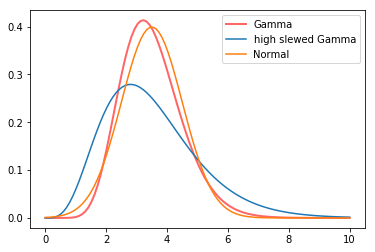

In [5]:
from scipy.stats import gamma
from scipy.stats import norm # Gaussian distribution

mu12 = mu1[1]
sigma12 = Sigma1[1][1]

print('Gaussian parameters first class second dimension x2:')
print(' mean: {}'.format(mu12))
print(' variance: {}'.format(sigma12))
print(' kurtosis: {}'.format(0.0))
print(' skewness: {}'.format(0.0))

# Gamma parameters

a = np.power(mu12/sigma12,2)
b = mu12/np.power(sigma12,2)

# Gamma kurtosis n skewness
sk = 2.0/np.sqrt(a)
ku = 6.0/a

print('Gamma parameters, kurtsosi and skewness:')
print(' alpha: {}'.format(a))
print(' beta: {}'.format(b))
print(' kurtosis: {}'.format(ku))
print(' skewness: {}'.format(sk))

a2 = 5.0
b2 = a2/mu12
ku2 = 6.0/a2
sk2 = 2.0/np.sqrt(a2)

print('High skewed Gamma parameters, kurtsosis and skewness:')
print(' alpha: {}'.format(a2))
print(' beta: {}'.format(b2))
print(' kurtosis: {}'.format(ku2))
print(' skewness: {}'.format(sk2))

# Ploting PDFs
x = np.linspace(0.0, 10.00,100)

ax = plt.gca()
ax.plot(x, gamma.pdf(x, a =a, scale=1.0/b),
         'r-', lw=2, alpha=0.6, label='gamma pdf')


ax.plot(x, gamma.pdf(x, a=a2, scale=1.0/b2),label='high slewed gamma pdf')

ax.plot(x, norm.pdf(x,loc=mu12, scale=sigma12))
ax.legend(['Gamma','high slewed Gamma','Normal'],loc=1)


* Group 1: $X^{(1)}$

Group1: 


(array([ 1.,  4., 12., 16., 13., 17.,  7.,  5.]),
 array([-3.6249, -2.8216, -2.0183, -1.215 , -0.4117,  0.3916,  1.1949,
         1.9982,  2.8015]),
 <a list of 8 Patch objects>)

Text(0.5,0,' x1')

(array([ 3.,  8., 19., 13., 17., 10.,  2.,  3.]),
 array([1.3793, 1.9148, 2.4504, 2.9859, 3.5215, 4.057 , 4.5926, 5.1281,
        5.6637]),
 <a list of 8 Patch objects>)

Text(0.5,0,'x2')

 kurtosis(x1): -0.3211037826833407
 skeness(x1): 0.014704566193279972
 kurtosis(x2): -0.22723594726350616
 skeness(x2): 0.1699726287240722


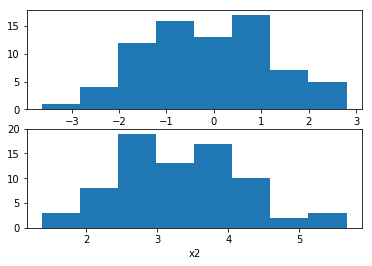

In [6]:
print('Group1: ')
plt.subplot(211)
plt.hist(X1[:,0], bins='auto')
plt.xlabel(" x1")

plt.subplot(212)
plt.hist(X1[:,1], bins='auto')
plt.xlabel("x2")

print(' kurtosis(x1): {}'.format(stats.kurtosis(X1[:,0])))
print(' skeness(x1): {}'.format(stats.skew(X1[:,0])))

print(' kurtosis(x2): {}'.format(stats.kurtosis(X1[:,1])))
print(' skeness(x2): {}'.format(stats.skew(X1[:,1])))

* Group 2: $X^{(2)}$

Group2: 


(array([ 3.,  4., 14., 17., 25., 27., 29., 19.,  6.,  4.,  1.,  1.]),
 array([ 0.1353,  1.0373,  1.9393,  2.8413,  3.7433,  4.6453,  5.5472,
         6.4492,  7.3512,  8.2532,  9.1552, 10.0572, 10.9592]),
 <a list of 12 Patch objects>)

Text(0.5,0,'Group2: x1')

(array([ 5., 10., 12., 22., 25., 25., 22., 19.,  6.,  4.]),
 array([-2.4441, -1.9334, -1.4227, -0.9119, -0.4012,  0.1095,  0.6202,
         1.1309,  1.6417,  2.1524,  2.6631]),
 <a list of 10 Patch objects>)

Text(0.5,0,'Group2: x2')

 kurtosis(x1): 0.09395065065792219
 skeness(x1): 0.08989816531204059
 kurtosis(x2): -0.4580014801844836
 skeness(x2): -0.06807308629539205


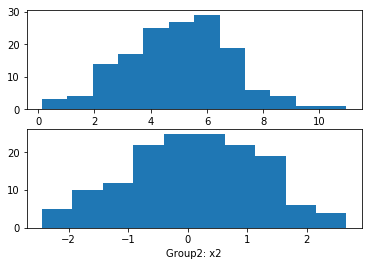

In [8]:
print('Group2: ')

plt.subplot(211)
plt.hist(X2[:,0], bins='auto')
plt.xlabel("Group2: x1")

plt.subplot(212)
plt.hist(X2[:,1], bins='auto')
plt.xlabel("Group2: x2")

print(' kurtosis(x1): {}'.format(stats.kurtosis(X2[:,0])))
print(' skeness(x1): {}'.format(stats.skew(X2[:,0])))

print(' kurtosis(x2): {}'.format(stats.kurtosis(X2[:,1])))
print(' skeness(x2): {}'.format(stats.skew(X2[:,1])))


Because the multivariate data have multicollinearity, the histogram of each dimensions has a slight skewness. So, they kurtosis and skewness are not that bad.

* Using multivariate normality test:

In [9]:
%load_ext rpy2.ipython

In [10]:
%%R -i df 

c1_df <- df[df$label == 1, c('x','y')]
c2_df <- df[df$label == 2, c('x','y')]

#head(x1_df,5)

R.version
library("MVN")

res_c1 <- mvn(c1_df,mvnTest='hz')
res_c2 <- mvn(c2_df,mvnTest='hz')

cat('1st class results of Henze-Zirkler’s:\n')
print(res_c1$multivariateNormality)
cat('\n')
cat('2nd class results of Henze-Zirkler’s:\n')
print(res_c2$multivariateNormality)

1st class results of Henze-Zirkler’s:
           Test        HZ   p value MVN
1 Henze-Zirkler 0.4986843 0.5387691 YES

2nd class results of Henze-Zirkler’s:
           Test        HZ   p value MVN
1 Henze-Zirkler 0.5566342 0.5562551 YES


The multivariate normality test reported both group are normal distributed. :)

## Estimating All parameters

* Estimating Gaussian parameters
* Comparing with the true values

In [11]:
m1, S1 = estimate_gaussian_parameters(X1)

print('1st class:')
print(' mean')
m1
print(' true value:')
mu1  # True value

print(' covariance')
S1
print(' true value:')
Sigma1 # True value

m2, S2= estimate_gaussian_parameters(X2)
print('2nd class:')
print(' mean')
m2
print(' true value:')
mu2 # True value

print(' covariance')
S2

print(' true value:')
Sigma2 # True value


1st class:
 mean


array([-0.1373,  3.347 ])

 true value:


[0.0, 3.5]

 covariance


array([[1.7351, 0.8165],
       [0.8165, 0.8014]])

 true value:


[[2.0, 1.1], [1.1, 1.0]]

2nd class:
 mean


array([4.9854, 0.106 ])

 true value:


[5.0, 0.0]

 covariance


array([[3.5165, 0.4491],
       [0.4491, 1.1866]])

 true value:


[[4.0, 0.5], [0.5, 1.0]]

* Estimating the other parameters
* checking the inverse matrix

In [12]:
S1_inv, pi1 = get_lda_paramaters(X1,N)
np.matmul(S1_inv,S1)

S2_inv, pi2 = get_lda_paramaters(X2,N)
np.matmul(S2_inv,S2)

array([[ 1.0000e+00, -6.9879e-17],
       [-8.6370e-17,  1.0000e+00]])

array([[ 1.0000e+00,  5.4734e-18],
       [-4.4085e-17,  1.0000e+00]])

## Computing the scores and labelling new data

* Computing the scores

In [13]:
s1 = lda_score(x_new,m1, S1,S1_inv, pi1)
s2 = lda_score(x_new,m2, S2,S2_inv, pi2)

print('scores:')
s1
s2

if s1 > s2:
    label_new = 1
else:
    label_new = 2

print('label of x_new:')
label_new

scores:


-12.192472006433297

-5.286700048728283

label of x_new:


2

Text(4.41,3.36,'new point')

Text(0.5,0,'x1')

Text(0,0.5,'x2')

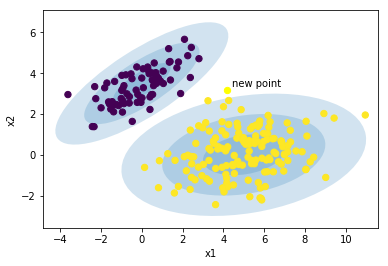

In [15]:
ax = plt.gca()

label_color = 'yellow' if label_new == 2 else 2

plot_gmm(initial_guess, X, label=labels, ax=ax)

ax.scatter(x_new[0], x_new[1], s=40, c=label_color, cmap='viridis', zorder=2)
ax.text( x_new[0]*1.05,x_new[1]*1.05, 'new point')
plt.xlabel('x1')
plt.ylabel('x2')

As expected, lda labeled the new datum as belongs to class 2.

## Verifying the scores by labeling known data

* labeling mean point of each group: $X^{(1)}$ and $X^{(2)}$
* labeling first data in the second group $X^{(2)}$
* labeling $x = (0,0)$ 

In [16]:
print('labeling centroids of each group')
print(' group 1')
s1 = lda_score(m1,m1, S1,S1_inv, pi1)
s2 = lda_score(m1,m2, S2,S2_inv, pi2)

s1
s2

assert s1 > s2

print(' group 2')
s1 = lda_score(m2,m1, S1,S1_inv, pi1)
s2 = lda_score(m2,m2, S2,S2_inv, pi2)

s1
s2

assert s2 > s1

print('labeling 1st point of the 2nd group')
X2[0,:]
s1 = lda_score(X2[0,:],m1, S1,S1_inv, pi1)
s2 = lda_score(X2[0,:],m2, S2,S2_inv, pi2)

s1
s2

assert s2 > s1

print('labeling point (0,0)')
s1 = lda_score([0,0],m1, S1,S1_inv, pi1)
s2 = lda_score([0,0],m2, S2,S2_inv, pi2)

s1
s2

labeling centroids of each group
 group 1


-1.0339882628913826

-11.130533153974207

 group 2


-46.87617390522937

-0.6812747153675094

labeling 1st point of the 2nd group


array([ 3.6223, -0.67  ])

-45.232445180496306

-1.105919041284957

labeling point (0,0)


-14.98882751119906

-4.339947397083326